# Tabular Data Analysis with `Pandas`

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

## Show first

### Dataset 1: Titanic

Let's start by loading the dataset as a Pandas **dataframe**:

In [3]:
file_path = Path("./data/tabular/titanic.csv")
assert file_path.exists(), "The data file does not exist!"

In [4]:
# Load the dataframe
df = pd.read_csv(file_path)

In [5]:
# Take a look at the top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check the age distribution of the passangers:

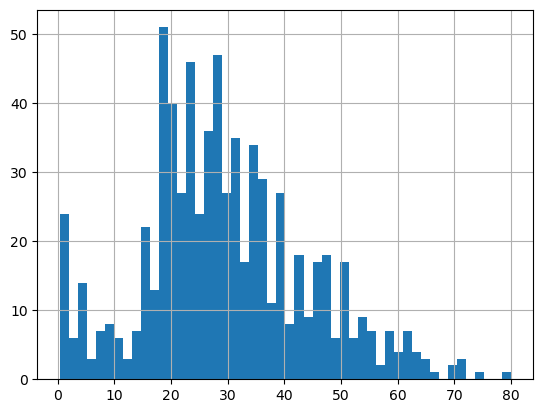

In [6]:
_ = df["Age"].hist(bins=50)

Does the survival rate change between passenger sex?

In [7]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
# Or...
df.groupby("Sex")["Survived"].aggregate(lambda grp: grp.sum() / len(grp))

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

How does the survival rate differ between classes:

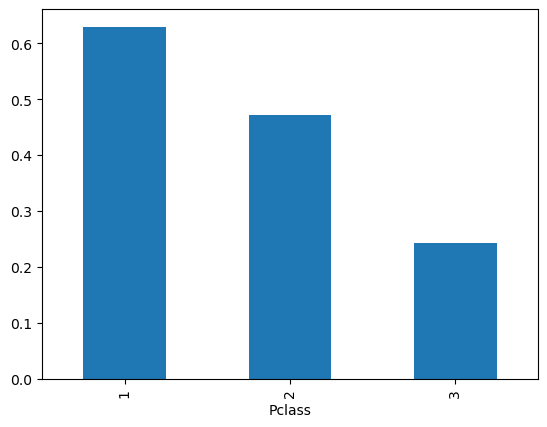

In [9]:
_ = df.groupby("Pclass")["Survived"].mean().plot(kind="bar")

### Dataset 2: Air Quality Measurement Timeseries

AirBase: hourly measurements of all air quality monitoring stations from Europe.

In [11]:
# Read the data
ts = pd.read_csv("./data/tabular/NO2_ts.csv", 
                 sep=";", 
                 skiprows=[1], 
                 na_values=["n/d"], 
                 index_col=0, 
                 parse_dates=True)

In [12]:
# Check a few rows from the dataframe
ts.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


Let's answer the following questions using Pandas:

**Does the air pollution shows a decreasing trend over the years?**

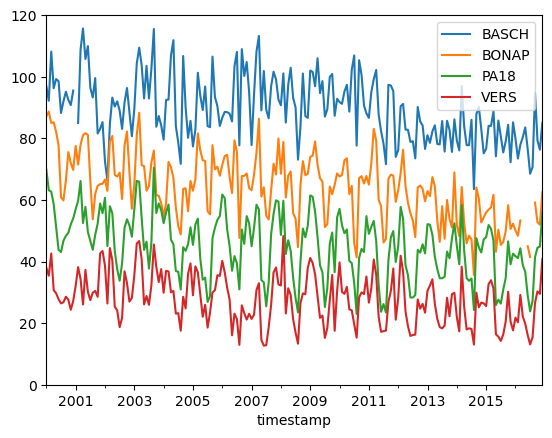

In [13]:
# Plot monthly averages over the covered years
_ = ts["1999":].resample("M").mean().plot(ylim=[0, 120])

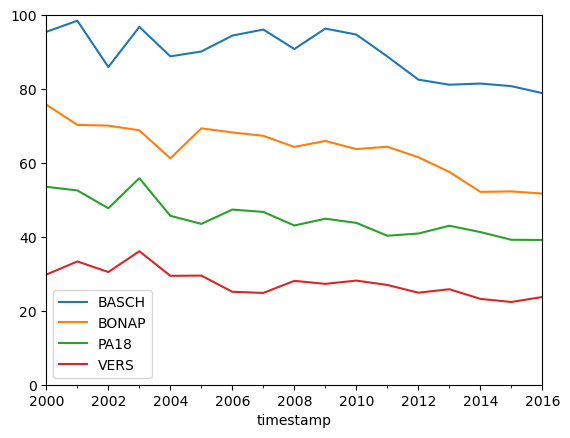

In [14]:
# Same but on an annual basis
_ = ts["1999":].resample("A").mean().plot(ylim=[0, 100])

**What is the difference in diurnal profile between weekdays and weekend?**

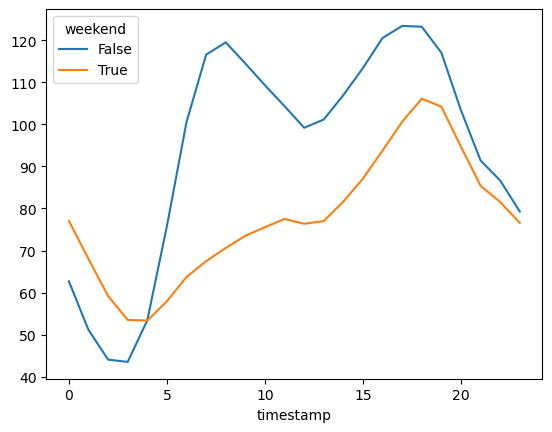

In [15]:
# Create the week day column
ts["weekday"] = ts.index.weekday

# Use the week day column to create the weekend binary column
ts["weekend"] = ts["weekday"].isin([5, 6])

# Group by the weekend(True/Falase)-hour and plot
ts_weekend = ts.groupby(["weekend", ts.index.hour])["BASCH"].mean().unstack(level=0)
_ = ts_weekend.plot()

## What is Pandas?

* **[Pandas](http://pandas.pydata.org/pandas-docs/stable/) can be thought of as NumPy arrays with labels for rows and columns**.
* Pandas provides a better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be though of as `R`'s `data.frame` in Python.
* Pandas is powerful for working with:
    * Missing data.
    * Time-series data.
    * Reading and writing data.
    * Reshaping, grouping, and merging data.

So, when do we need Pandas?

In summary, we want to use Pandas when working with **tabular or structured data** (like SQL, excel, CSV, etc). We list the following sub-tasks:
- Importing data.
- Cleaning up messy data.
- Exploring data and gaining insights.
- Processing and preparing your data for machine learning.
- Data modeling together with scikit-learn, statsmodels, etc.

On the other hand, Pandas is not good with the following:

- Multi-dimensional array data: imagery, language, audio, etc.
- Labeled data (ex. climate data): have a look at [XArray](http://xarray.pydata.org/en/stable/).

## `DataFrame` & `Series`

A `Dataframe` is a tabular data structure comprised of rows and columns, akin to a spreadsheet, database tables, or R's data.frame objects. We can also think of it as multiple Series objects that share the same index.

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Attributes of a `DataFrame`

A dataframe has besides an `index` attribute, the `columns` attribute:

In [17]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

To get an overview of the dataframe we can use the `info()` method:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


To get the dataframe's associated NumPy array, we can simply use `values`.

Attention: when you have heterogeneous data, all values will be upcasted:

In [21]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing the data from an external source, one of the most common ways of creating a dataframe is from a dictionary with "column -> values" associations:

In [22]:
# Define the dataset
data = {
    "country": ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
    "population": [11.3, 64.3, 81.3, 16.9, 64.9],
    "area": [30510, 671308, 357050, 41526, 244820],
    "capital": ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']
}

# Create a dataframe using the dataset
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### `Series`: One-dimensional data

A series is a basic data holder for **one-dimensional labeled data**. 

In [23]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
age = df["Age"]

### Attributes of a Series: `index` & `values`

The series has also an `index` and `values` attribute, but no `columns`:

In [25]:
age.index

RangeIndex(start=0, stop=891, step=1)

We can access the underlying NumPy array representation with the `.values` attribute:

In [26]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access the series values via the index, just like NumPy arrays:

In [27]:
age[0]

22.0

Unlike NumPy arrays, a dataframe's index can be something other than integers:

In [28]:
df = df.set_index("Name")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [29]:
# Get the ages indexed by name
age = df["Age"]

# Get the age of a specific person (indexing)
age["Dooley, Mr. Patrick"]

32.0

With the power of NumPy arrays, many things we can do with NumPy arrays can also be applied on DataFrames and Series:

In [30]:
# Element-wise operations
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
Allen, Mr. William Henry                               35000.0
                                                        ...   
Montvila, Rev. Juozas                                  27000.0
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

In [31]:
# ufuncs
age.mean()

29.69911764705882

In [32]:
# Fancy indexing
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

.. but also a lot of Pandas sepcific methods, example:

In [33]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Let's answer a few questions:

What is the maximum fare that was paid? And the median?

In [34]:
df["Fare"].max(), df["Fare"].median() 

(512.3292, 14.4542)

Calculate the average survival ratio for all passengers:

In [35]:
df["Survived"].mean()

0.3838383838383838

## Data Import/Export

A wide range of input/output formats are natively supported by Pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [37]:
# Un-comment code -> go to end-of-line -> press tab 
#pd.read
#df.to

Pandas provides a very powerful CSV reader:

In [38]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

Luckily, if we have a well formatted CSV file, we won't need any of the "read_csv" arguments:

In [39]:
df = pd.read_csv("./data/tabular/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploration

Let's start by reading the pollution data:

In [42]:
no2 = pd.read_csv("./data/tabular/NO2_ts.csv", 
                  sep=";", 
                  skiprows=[1], 
                  na_values=["n/d"], 
                  index_col=0, 
                  parse_dates=True)

We use `head` and `tail` to poke the dataframe:

In [43]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


In [44]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


In [45]:
# We use info() to get an overview
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   BASCH   139949 non-null  float64
 1   BONAP   136493 non-null  float64
 2   PA18    142259 non-null  float64
 3   VERS    143813 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


We can get some basic summary statistics about the data using `describe()`:

In [46]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Pandas makes use of `matplotlib` internally which we can leverage to quickly visualize the data:

<Axes: >

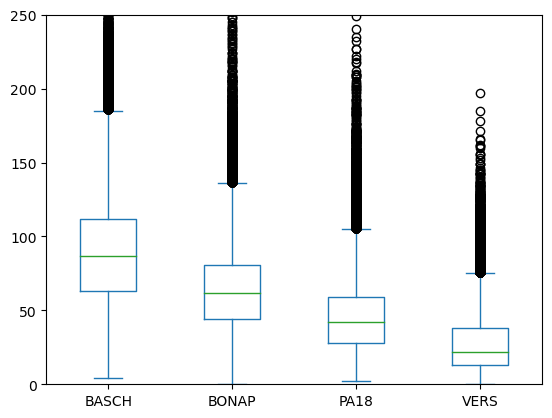

In [47]:
no2.plot(kind="box", ylim=[0, 250])

Let's plot `BASCH`'s distribution:

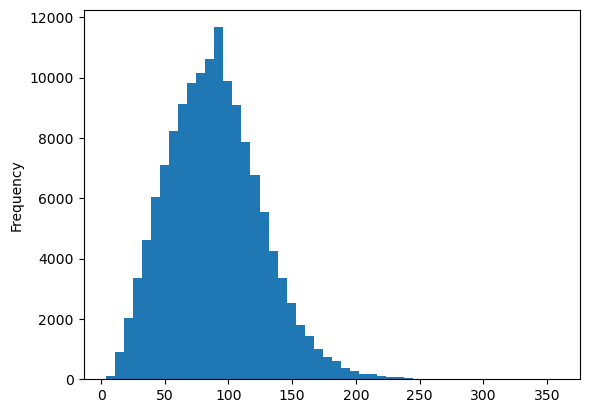

In [49]:
_ = no2["BASCH"].plot(kind="hist", bins=50)

The default plot is a line plot of all the columns:

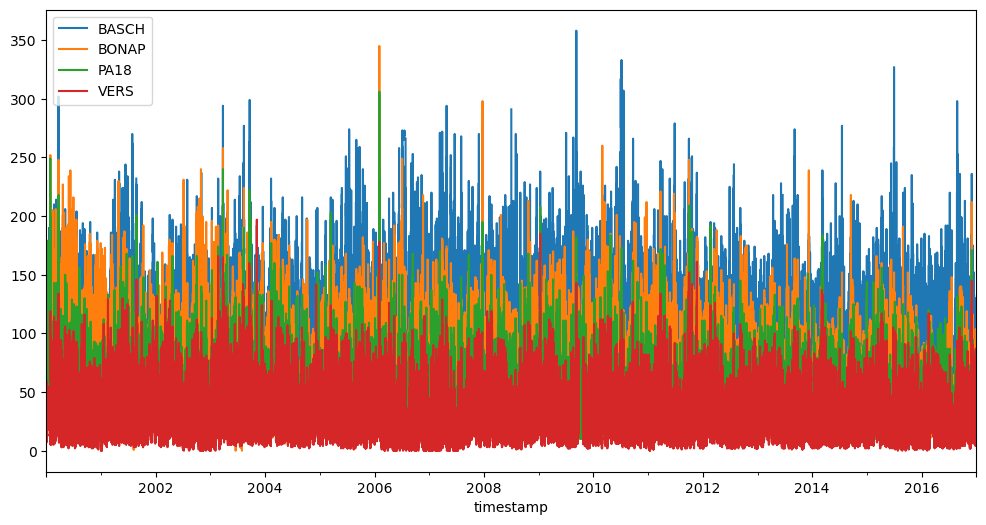

In [50]:
_ = no2.plot(figsize=(12, 6))

The dataframe is very dense, let's select a later slice of the dataframe: 

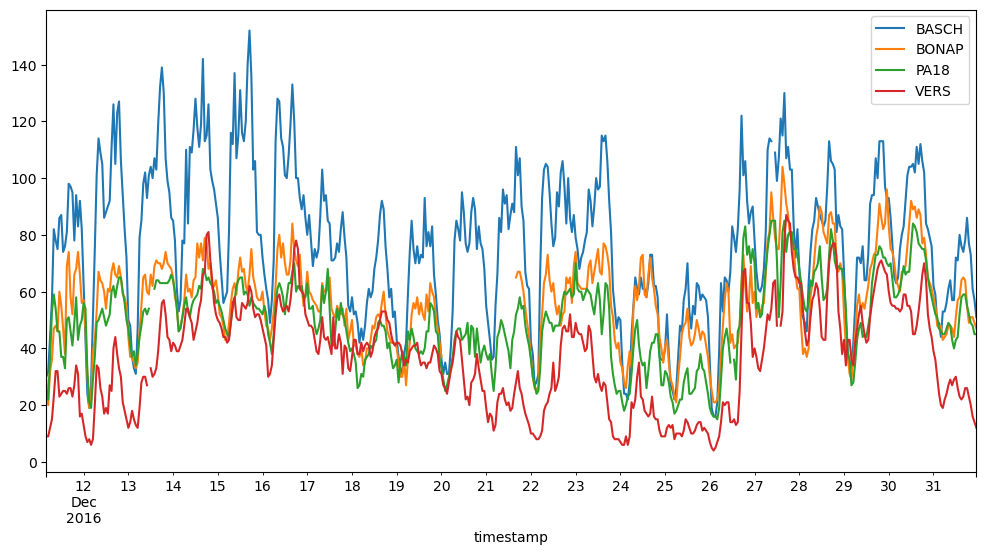

In [52]:
_ = no2[-500:].plot(figsize=(12, 6))

## Selecting & Filtering Data

In [53]:
df = pd.read_csv("./data/tabular/titanic.csv")

### `df[]` profiles convenient shortcuts

For a Dataframe, basic indexing selects the columns:

In [54]:
# Select a single columns
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Or multiple columns:

In [55]:
df[["Age", "Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


.. but slicing will access the rows instead:

In [56]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` & `iloc`

When using `[]` like above, we can only select from axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:

- `loc`: selection by labels.
- `iloc`: selection by position.

In [57]:
df = df.set_index("Name")

In [58]:
# Select Miss. Elizabth Fare information
df.loc["Bonnell, Miss. Elizabeth", "Fare"]

26.55

In [59]:
# Select all people between two names and get all columns
df.loc["Bonnell, Miss. Elizabeth":"Andersson, Mr. Anders Johan", :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar to indexing NumPy arrays:

In [60]:
# First two rows, second and third columns
df.iloc[:2, 1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign values:

In [61]:
df.loc["Braund, Mr. Owen Harris", "Survived"] = 100
df.loc["Braund, Mr. Owen Harris"]

PassengerId            1
Survived             100
Pclass                 3
Sex                 male
Age                 22.0
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with "boolean indexing" and comparable to NumPy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed:

In [62]:
df["Fare"] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [63]:
# Filter
mask = df["Fare"] > 50
df[mask]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

## The "GroupBy" Operation

Let's start by creating some dummy data:

In [64]:
df = pd.DataFrame({"key":["A", "B", "C", "A", "B", "C", "A", "B", "C"],
                   "data": [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: Aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like mean, max, min, etc). As we have seen before, we can easily calculate such statistics for a Series or column using one of the many available methods. For example:

In [65]:
df["data"].sum()

90

However, in many cases, the data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column `key` which has three possible values: `A`, `B`, `C`. If we want to calcualte the sum for each of those groups, we could do the following:

In [66]:
for k in list("ABC"):
    print(k, df[df["key"] == k]["data"].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. What we did above, apply a function on different groups, is a "groupby operation", and pandas provides some convenient functionalities to do this.

### GroupBy: applying functions per group

We want to **apply the same function on subsets of the dataframe, based on some key to split the dataframe in subsets**.

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:
1. **Splitting** the data into groups based on some criteria.
2. **Applying** a function to each group independently.
3. **Combining** the results into a data structure.

In [67]:
# Group by unique values of "key" and sum over the rest of the columns
df.groupby("key").sum()

,data
key,
A,15
B,30
C,45


In [68]:
# Same...
df.groupby("key").aggregate(np.sum)

,data
key,
A,15
B,30
C,45


### Application of the "groupby" concept on the titanic data 

We go back to the titanic passengers survival data:

In [69]:
df = pd.read_csv("./data/tabular/titanic.csv")

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

## Working with Time-series data

In [70]:
# Read the file into a dataframe
no2 = pd.read_csv("./data/tabular/NO2_ts.csv", 
                  sep=";", 
                  skiprows=[1], 
                  na_values=["n/d"], 
                  index_col=0, 
                  parse_dates=True)

Time-series related functionalities are enabled when the index is date-time. Let's make sure of that:

In [71]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

We can index the time-series using strings that represent dates:

In [72]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


A nice feature is "partial date-string" indexing, e.g., we don't need to provide the full datetime string:

In [73]:
# Get all data of January up to March 2012
no2["2012-01":"2012-03"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
2012-01-01 04:00:00,47.0,29.0,21.0,12.0
...,...,...,...,...
2012-03-31 19:00:00,75.0,62.0,46.0,21.0
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0


Time and date components can be accessed from the index:

In [74]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [75]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

### Converting time-series using `resample`

A very powerful Pandas method is `resample` that converts the frequency of the time-series (ex. hourly to daily).

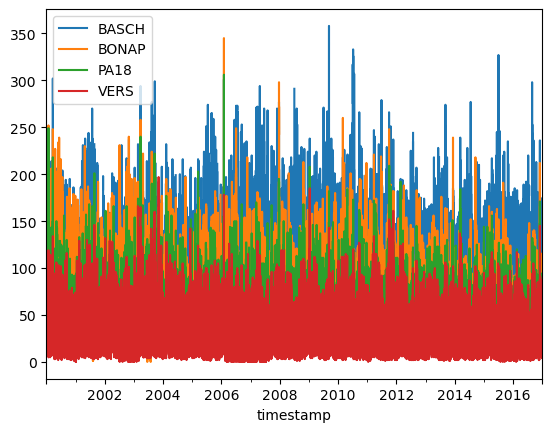

In [76]:
_ = no2.plot()

The time series has a frequency of 1 hour. Let's check it to daily:

In [77]:
no2.resample("D").mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


We can also get other statistics besides the mean:

In [78]:
no2.resample("D").max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,109.0,62.0,77.0,59.0
2000-01-02,109.0,96.0,78.0,45.0
2000-01-03,120.0,102.0,72.0,37.0
2000-01-04,115.0,107.0,78.0,43.0
2000-01-05,141.0,115.0,82.0,41.0


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

<div class="alert alert-success">

<b>EXERCISE</b>: The evolution of the yearly averages with, and the overall mean of all stations

 <ul>
  <li>Use `resample` and `plot` to plot the yearly averages for the different stations.</li>
  <li>The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: how does the *typical monthly profile* look like for the different stations?

 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: The typical diurnal profile for the different stations

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: What is the difference in the typical diurnal profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a days is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>

## Things we have not covered

- Concatenating dataframes (`pd.concat`).
- Merging and joining data (`pd.merge`).
- Reshaping data (`pivot_table`, `melt`, `stack`, `unstack`).
- Working with missing data (`isnull`, `dropna`, `interpolate`).
- ...

# Further Reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/
* Books
    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas
* Tutorials (many good online tutorials!)
  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial
* Tom Augspurger's blog
  * https://tomaugspurger.github.io/modern-1.html
  
# Credits

Joris Van den Bossche's [Pandas tutorial](https://github.com/jorisvandenbossche/pandas-tutorial).

---